
# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In  this project ,we are going to investigate the findings within the NO_show_appointments dataset based on the Neighbourhood relationship within the standard determining outcomes od PaymentID and PatientId.
Scholarship allocation relates directly to Neighbourhood allocation derived from the patients admitted for appointments.
Gender and Age tables also decribe the data in different view relations but all depend on Neighbourhood and AppointmentDay.

### Question(s) for Analysis
Question1.
           Identify the factors that are important indoder to decide on future appointments scheduled in a Neighbourhood.
           According to this, i will analyze the main Neighbouhood table and relate it to Hipertension,Alcoholism and Diabetes 
           related data in an appointments.
        
Question2:
            In relation to appointments which categories are the highest appointments and priority.
           In corelation, the Hipertension, Alcoholism and Diabetes appointments appear to display different results as per the
           mean of appointments.
           Exploring the main mean distribuion of the dependant variables in a dataset in all No-show_apointments.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('No_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [208]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.8MB/s eta 0:00:01   65% |█████████████████████           | 6.9MB 27.6MB/s eta 0:00:01    78% |█████████████████████████▏      | 8.2MB 28.8MB/s eta 0:00:01    91% |█████████████████████████████▏  | 9.5MB 27.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.3MB/s eta 0:00:01   16% |█████▍                          | 2.3MB 27.0MB/s eta 0:00:01    36% |███████████▋                    | 4.9MB 26.7MB/s eta 0:00:01    46% |██████████████▊                 | 6.2MB 27.4MB/s eta 0:00:01    74% |███████████████████████▉        | 10.0MB 28.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

# Load and inspect data

Read through the dataset 

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [56]:
# Locate the dataset  information.
#Inspect the shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [57]:
#  check for statistics within the No_show_appointments
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Describe and read through missing values in No_show_appointments over time

In [58]:
#Missing values in the No_show_appointments
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#Analyze the dataset to check the full data available values 

In [59]:
#missing values in dataset
df[df.Age.isnull()].sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [60]:
#Deriving the mean for first variable 'Age'
df.groupby('Age').mean()

,PatientId,AppointmentID,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,,,,,,,,
-1,4.659432e+14,5.775010e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,1.539027e+14,5.671375e+06,0.014693,0.000000,0.000000,0.000000,0.000283,0.253461
1,1.580224e+14,5.678714e+06,0.036076,0.000000,0.000440,0.000000,0.000440,0.249010
2,1.437773e+14,5.681502e+06,0.073548,0.000000,0.000618,0.000000,0.000618,0.242892
3,1.447703e+14,5.678064e+06,0.089888,0.000000,0.000000,0.000000,0.000000,0.267019
4,1.512473e+14,5.677033e+06,0.110855,0.000770,0.000770,0.000770,0.006928,0.293303
5,1.404347e+14,5.674069e+06,0.166555,0.000000,0.000000,0.000672,0.002686,0.331766
6,1.325496e+14,5.675511e+06,0.161736,0.000000,0.000000,0.000000,0.007232,0.335963
7,1.592728e+14,5.674589e+06,0.134548,0.002803,0.002102,0.001402,0.009110,0.309040


In [61]:
#Derive mean for appointmentID and PatientID
df.groupby('Age').mean().sum()

PatientId        1.586563e+16
AppointmentID    5.903018e+08
Scholarship      7.740362e+00
Hipertension     3.164387e+01
Diabetes         1.121672e+01
Alcoholism       2.494210e+00
Handcap          5.121079e+00
SMS_received     3.092896e+01
dtype: float64

Groupby mean using with sum. using groupby

In [62]:
df.groupby('AppointmentID').mean().sum()

PatientId       1.630232e+19
Age             4.099322e+06
Scholarship     1.086100e+04
Hipertension    2.180100e+04
Diabetes        7.943000e+03
Alcoholism      3.360000e+03
Handcap         2.459000e+03
SMS_received    3.548200e+04
dtype: float64

Assesing for duplicates in the dataset distributions

In [63]:
#use means to fill in missing values
df.groupby('Alcoholism').mean().sum()

PatientId        3.104192e+14
AppointmentID    1.136346e+07
Age              8.629056e+01
Scholarship      2.535625e-01
Hipertension     5.859881e-01
Diabetes         1.698295e-01
Handcap          4.860311e-02
SMS_received     5.752705e-01
dtype: float64

In [15]:
#Checking for duplicates in the No_show_appointments.csv file dataset
sum(df.duplicated())

0

In [16]:
#Drop duplicates if any in the appointments dataset
df.drop_duplicates(inplace=True)

In [17]:
#Try to check if info is effected in the dataset
sum(df.duplicated())

0

#Checking for unique and not unique values in the variables dataset

In [54]:
sum(df.nunique())

276606

In [56]:
sum(df.Age.unique())

5266

In [62]:
sum(df.Alcoholism.unique())

1

In [68]:
sum(df.PatientId.unique())

9.1686147667821322e+18

In [71]:
sum(df.Scholarship.unique())

1

In [72]:
sum(df.Hipertension.unique())

1

#Create and read datatypes within the .csv No_show_appointments dataset

In [2]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


### Data Cleaning

#Further draw cleaning dataset infoamtions

In [ ]:
# Fill missing values
df.fillna(df.Age(), inplace=True)

In [76]:
#Describe the current dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [78]:
#Check for the derived duplicates
sum(df.duplicated())

0

In [79]:
#From the dataset drop out the duplicates
df.drop_duplicates(inplace=True)

In [80]:
#Confirm the corrections initiated in the dataset
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What factors are important to predict if patients will be scheduled appointment)

#Read through the remaining data and further explore unique statistics.

In [65]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [66]:
df.drop(['PatientId','AppointmentID','Gender','Age','No-show','ScheduledDay'], axis=1,inplace=True)
df.head()

,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,2016-04-29T00:00:00Z,JARDIM DA PENHA,0,1,0,0,0,0
1,2016-04-29T00:00:00Z,JARDIM DA PENHA,0,0,0,0,0,0
2,2016-04-29T00:00:00Z,MATA DA PRAIA,0,0,0,0,0,0
3,2016-04-29T00:00:00Z,PONTAL DE CAMBURI,0,0,0,0,0,0
4,2016-04-29T00:00:00Z,JARDIM DA PENHA,0,1,1,0,0,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
AppointmentDay    110527 non-null object
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.7+ MB


#Visualize the data explored after initial analysis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa581bcada0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa581a8f748>]], dtype=object)

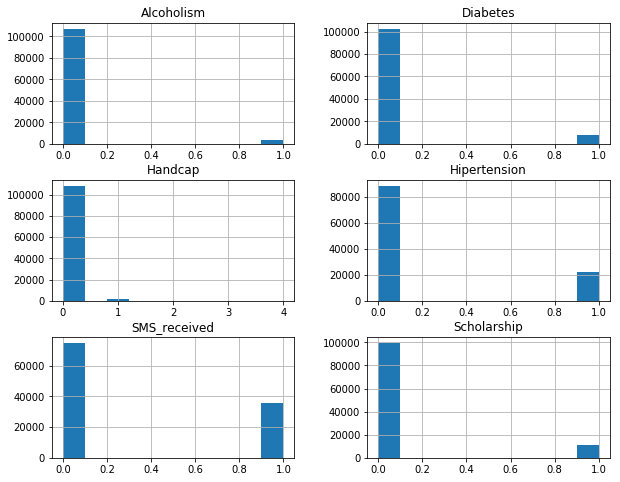

In [68]:
df.hist(figsize=(10,8))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
AppointmentDay    110527 non-null object
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.7+ MB


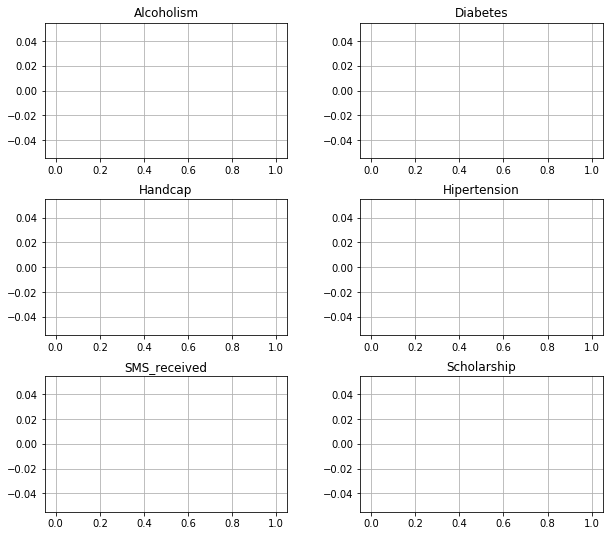

In [78]:
df[df.AppointmentDay.isnull()].hist(figsize=(10,9));
df.fillna(df.mean(),inplace=True)
df.info()

In [77]:
df.head()

,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,2016-04-29T00:00:00Z,JARDIM DA PENHA,0,1,0,0,0,0
1,2016-04-29T00:00:00Z,JARDIM DA PENHA,0,0,0,0,0,0
2,2016-04-29T00:00:00Z,MATA DA PRAIA,0,0,0,0,0,0
3,2016-04-29T00:00:00Z,PONTAL DE CAMBURI,0,0,0,0,0,0
4,2016-04-29T00:00:00Z,JARDIM DA PENHA,0,1,1,0,0,0


In [26]:
df[df.Scholarship.isnull()]
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


#Draw conclusion bar of data vaiables mean in relation to the the scholarhip

In [8]:
def mean_plotting(df,Scholarship):
    df.groupby(Diabetes).plot(kind='bar')
    plt.show()
    df.head()

<function matplotlib.pyplot.show(*args, **kw)>

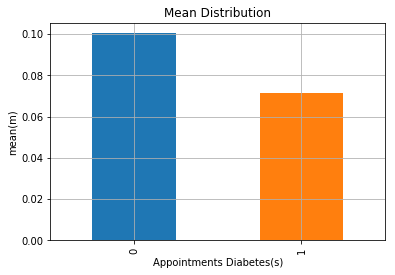

In [7]:
df.groupby('Diabetes').Scholarship.mean()df.groupby('Diabetes').Scholarship.mean().plot(kind='bar');plt.xlabel('Appointments Diabetes(s)')plt.ylabel('mean(m)')plt.title('Mean Distribution')plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

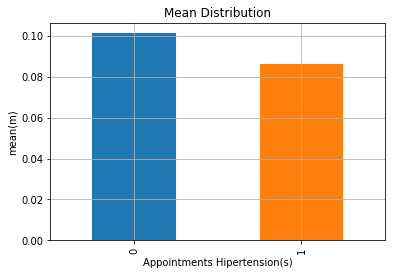

In [69]:
df.groupby('Hipertension').Scholarship.mean()
df.groupby('Hipertension').Scholarship.mean().plot(kind='bar');plt.xlabel('Appointments Hipertension(s)')plt.ylabel('mean(m)')plt.title('Mean Distribution')plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

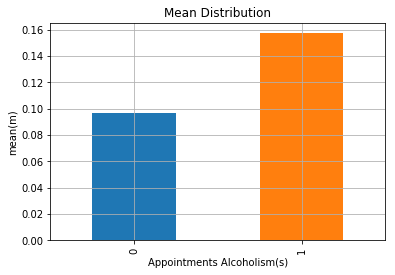

In [67]:
df.groupby('Alcoholism').Scholarship.mean()df.groupby('Alcoholism').Scholarship.mean().plot(kind='bar');
plt.xlabel('Appointments Alcoholism(s)')plt.ylabel('mean(m)')plt.title('Mean Distribution')plt.grid(True)plt.show

#According to the main AppointmentDay variable.

<function matplotlib.pyplot.show(*args, **kw)>

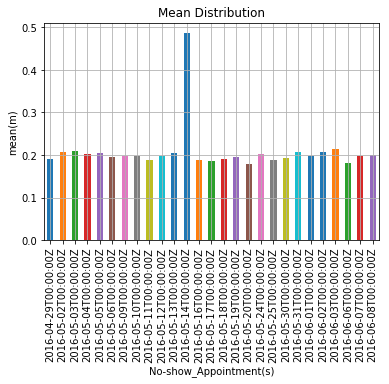

In [70]:
df.groupby('AppointmentDay').Hipertension.mean().plot(kind='bar');
plt.xlabel('No-show_Appointment(s)')plt.ylabel('mean(m)')plt.title('Mean Distribution')plt.grid(True)
plt.show

Mean value as per patient appointments is derived from the appointmentDay and specific Neighbourhood.

In [139]:
df.AppointmentDay.value_counts()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

#Check if the variables can be represented as a Number.

In [209]:
df.query('AppointmentDay=="Diabetes"')['Scholarship'].mean(), df.query('AppointmentDay=="Hipertension"')['Scholarship'].mean()

(nan, nan)

#check for mean standings as per each variable in a scholarship and visualize.

<function matplotlib.pyplot.show(*args, **kw)>

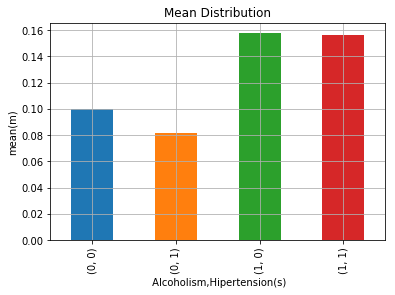

In [73]:
df.groupby(['Alcoholism', 'Hipertension']).Scholarship.mean().plot(kind='bar');plt.xlabel(' Alcoholism,Hipertension(s)')plt.ylabel('mean(m)')plt.title('Mean Distribution')plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

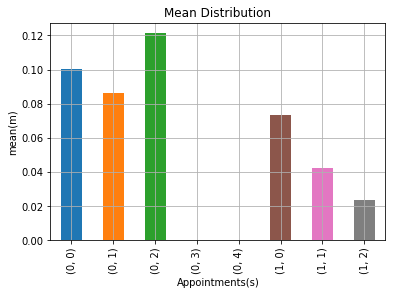

In [78]:
df.groupby(['Diabetes', 'Handcap']).Scholarship.mean().plot(kind='bar');plt.xlabel('Appointments(s)')plt.ylabel('mean(m)')plt.title('Mean Distribution')plt.grid(True)
plt.show

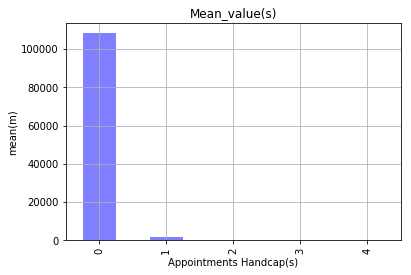

In [77]:
df['Handcap'].value_counts().plot(kind='bar', alpha=0.5,color='blue')plt.xlabel('Appointments Handcap(s)')plt.ylabel('mean(m)')plt.title('Mean_value(s)')plt.grid(True)
plt.show()

### Research Question 2  (What  determines the Neighbouhood appointment )

# Explore appointments data in the Neighbourhood variable

In [147]:
#View the current dataset information available on NO-Show_Appointments dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 8 columns):
AppointmentDay    110527 non-null object
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
dtypes: int64(6), object(2)
memory usage: 7.6+ MB


In [148]:
df.fillna(df.mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 8 columns):
AppointmentDay    110527 non-null object
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
dtypes: int64(6), object(2)
memory usage: 7.6+ MB


In [149]:
Hipertension=df.Neighbourhood==True
Diabetes=df.Neighbourhood==False

#Deduce the mean distribution from the full dataset per appointments .

In [194]:
df.Alcoholism.mean()

0.030399811810688793

In [168]:
df.Diabetes.mean()

0.07186479321794674

In [169]:
df.Hipertension.mean()

0.19724592181096021

#Describe the distribution of patients mean attandance in a Neighbourhood.
#Visualize the highest mean of patients in a Neighbourhood.

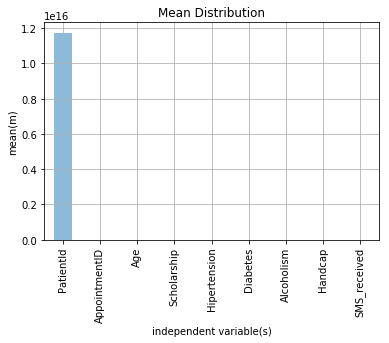

In [81]:
df.groupby('Neighbourhood').mean().sum().plot(kind='bar',alpha=0.5, )plt.xlabel('independent variable(s)')plt.ylabel('mean(m)')plt.title('Mean Distribution')plt.grid(True)
plt.show()

#Plot Patients as per the scholarship allocation in mean distribution.
#Analyze mean per scholarship allocation.

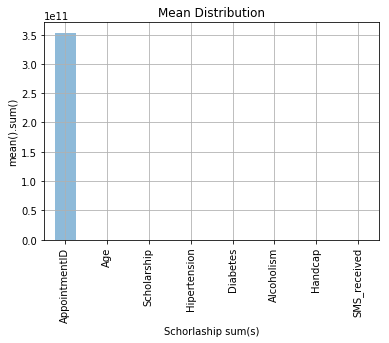

In [88]:
df.groupby('PatientId').mean().sum().plot(kind='bar',alpha=0.5,)plt.xlabel('Schorlaship sum(s)')plt.ylabel('mean().sum()')plt.title('Mean Distribution')plt.grid(True)
plt.show()

In [ ]:
<a id='conclusions'></a>
## Conclusions
Findings:
    The Hipertension variable distributes highest in either of the scholarship allocation and the Neighbourhood.
    
    Handcap variable is least focused in the appointments and records the lowest turnouts in every set of data.
    
    According to the data, Hipertention table records a highest mean distribution of 0.2 as opposed to Diabetes 0.07 and 
    Alcoholism mean appointments of 0.03.
    This describes that there is least number of allocations in the variable of Alcoholism addmitted per AppointmentDay and ID.
    
    datatypes of variables are related to integer types as opposed to the Neighbouhood and AppointmentDa which are Object datatypes.
    
    
    In relation to the main No_show appointments, the dataset relates to the columns and rows with different No_show commands as 
    per the Variable of alloction.
Limitations:
    No-Show_appointments data would have been more relevent to include time timestamps which when referenced to the Age and Gender 
    then can be used to detrermine how groups respond to and how fast the response of patients is disitributed.
    This would also create an anlysis argument whish can relate No-show attribute netween the younger category and older reactions to show-up fpr appointments.
    
    
    


In [9]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0